In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [19]:
x_train=train_data.flow_from_directory(r"D:\assignment 3\dataset\Training",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_data.flow_from_directory(r"D:\assignment 3\dataset\testing",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 3453 images belonging to 5 classes.
Found 864 images belonging to 5 classes.


In [20]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [21]:
model=Sequential()

In [22]:
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(3,3)))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [26]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [48]:
model.save("flower.h5")

In [49]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [50]:
import numpy as np

In [51]:
model=load_model("flower.h5")

In [34]:
img=image.load_img("daisy1.jpg",target_size=(64,64))

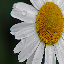

In [52]:
img

In [53]:
type(img)

PIL.Image.Image

In [55]:
x=image.img_to_array(img)

In [56]:
x

array([[[ 29.,  44.,  25.],
        [ 29.,  44.,  25.],
        [ 31.,  46.,  27.],
        ...,
        [206., 206., 208.],
        [201., 200., 205.],
        [193., 192., 197.]],

       [[ 29.,  44.,  25.],
        [ 30.,  45.,  26.],
        [ 31.,  46.,  27.],
        ...,
        [207., 207., 209.],
        [198., 198., 200.],
        [192., 192., 194.]],

       [[ 30.,  45.,  26.],
        [ 32.,  47.,  28.],
        [ 31.,  46.,  27.],
        ...,
        [200., 200., 202.],
        [193., 193., 195.],
        [202., 202., 204.]],

       ...,

       [[ 25.,  40.,  17.],
        [ 25.,  38.,  20.],
        [ 23.,  36.,  18.],
        ...,
        [204., 203., 208.],
        [204., 204., 202.],
        [192., 191., 196.]],

       [[ 25.,  41.,  14.],
        [ 25.,  38.,  18.],
        [ 23.,  36.,  18.],
        ...,
        [205., 204., 209.],
        [209., 209., 211.],
        [193., 193., 193.]],

       [[ 22.,  40.,  16.],
        [ 23.,  38.,  19.],
        [ 24.,  

In [57]:
x.shape

(64, 64, 3)

In [58]:
x=np.expand_dims(x,axis=0)

In [59]:
pred_prob=model.predict(x)

1/1 [==============================] - 0s 90ms/step


In [60]:
pred_prob

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [61]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
pred_id=pred_prob.argmax(axis=1)[0]

In [62]:
pred_id

0

In [46]:
Predicted animalis  Daisy

0

In [64]:
print("Predicted Flower ",str(class_name[pred_id]))

Predicted Flower  Daisy
